<a href="https://colab.research.google.com/github/PosgradoMNA/actividades-de-aprendizaje-A01793672/blob/main/DataAnalysisPythonIBM_M3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**DATA ANALYSIS WITH PYTHON (IBM)**
---
#**Modulo 3 - Análisis Exploratorio de Datos**
---
##**Alumno: Freddy Armendariz Herrera**
##**Matrícula: A01793672**
---

---
##**Fundamentos**

El Análisis Exploratorio de Datos o *EDA* es un paso preliminar en el análisis de datos con los siguientes objetivos:

* Resumir las características principales de los datos.
* Obtener un mejor entendimiento del conjunto de los datos.
* Descrubrir relaciones entre las variables.
* Extraer variables importantes.

Para este caso, se trata de resolver la siguiente pregunta:

¿Cuáles son las características que tienen mayor impacto en el precio del auto?

**Aprendizajes esperados:**

* Estadística descriptiva: describe las características básicas de un conjunto de datos.
* Agrupar por: tranformar los datos utilizando *groupby*.
* ANOVA: Análisis de la varianza.
* Correlación.
* Correlación estadística.

In [37]:
#Se importan librerías y se carga el dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/auto.csv"
df = pd.read_csv(url, header = None)
headers = ["symboling","normalized-losses","make","fuel-type","aspiration","num-of-doors","body-style",
           "drive-wheels","engine-location","wheel-base","length","width","height","curb-weight",
           "engine-type","num-of-cylinders","engine-size","fuel-system","bore","stroke","compression-ratio",
           "horsepower","peak-rpm","city-mpg","highway-mpg","price"]
df.columns=headers #Reemplaza el encabezado por defecto.

df.dropna(              #Selecciona filas o columnas con valores faltantes para eliminarlos.
    subset=["price"],   #Columna donde se verifican datos faltantes.
    axis=0,             #0 para registros y 1 para columnas.
    inplace=True        #La modificación se realiza directamente en el dataset.
)

df.replace('?',np.NaN,inplace=True) #Reemplaza los ? por NaN
df["normalized-losses"]=df["normalized-losses"].astype(float) #Cambia el tipo de dato de la columna seleccionada
mean=df["normalized-losses"].mean() #Calcula el promedio de la columna

df["normalized-losses"].replace(  #Seleeciona la columna normalized-losses para reemplazar datos
    np.nan,                       #Un valor NaN
    mean,                         #Por el promedio de dicha columna
    inplace=True                  #Directamente sobre el dataset
)
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,122.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


---
##**Estadística Descriptiva**

Describe características básicas de los datos.

Se obtienen breves resúmenes sobre la muestra y las mediciones de los datos.

Uno de los métodos es utilizando *describe()*.

In [38]:
df.describe()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-mpg,highway-mpg
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,122.000000,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,10.142537,25.219512,30.751220
std,1.245307,31.681008,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,3.972040,6.542142,6.886443
min,-2.000000,65.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,7.000000,13.000000,16.000000
25%,0.000000,101.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,8.600000,19.000000,25.000000
50%,1.000000,122.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,9.000000,24.000000,30.000000
75%,2.000000,137.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,9.400000,30.000000,34.000000
max,3.000000,256.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,23.000000,49.000000,54.000000


Para obtener un resumen de alguna variable categórica se puede utilizar el método *value_counts()*.

In [39]:
drive_wheels_counts = df["drive-wheels"].value_counts().to_frame()
drive_wheels_counts.rename(columns={"drive-wheels": "value_counts"}, inplace=True)
drive_wheels_counts.index.name = "drive-wheels"
drive_wheels_counts

,value_counts
drive-wheels,
fwd,120
rwd,76
4wd,9


Los diagramas de caja también son una buena manera para visualizar la distribución de los datos.

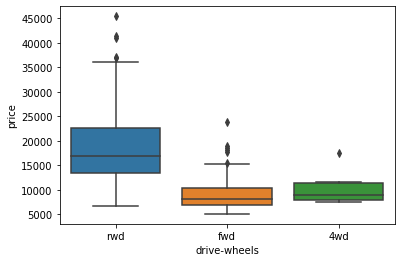

In [45]:
df["price"]=df["price"].astype(float)
sns.boxplot(x="drive-wheels", y="price", data=df)

Aveces se requiere saber cuales son las variables continuas en nuestro set de datos. Una manera para visualizar esto es usando un scatter plot. Este gráfico muestra la relación entre dos variables: variable predictora y variable objetivo.

Text(0, 0.5, 'Price')

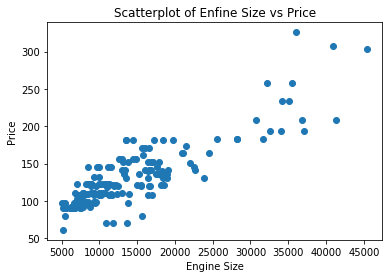

In [46]:
y=df["engine-size"]
x=df["price"]
plt.scatter(x,y)
plt.title("Scatterplot of Enfine Size vs Price")
plt.xlabel("Engine Size")
plt.ylabel("Price")

---
##**Agrupar por o *Groupby()***

Se requiere saber cual tipo de sistema de manejo agrega mas valor al vehículo, para esto se agrupan los datos por sus diferentes tipos de tracciones y se comparan los resultados unos contra otros.

In [48]:
df_test = df[["drive-wheels","body-style","price"]]
df_grp = df_test.groupby(["drive-wheels","body-style"], as_index=False).mean()
df_grp

,drive-wheels,body-style,price
0,4wd,hatchback,7603.000000
1,4wd,sedan,12647.333333
2,4wd,wagon,9095.750000
3,fwd,convertible,11595.000000
4,fwd,hardtop,8249.000000
5,fwd,hatchback,8396.387755
6,fwd,sedan,9811.800000
7,fwd,wagon,9997.333333
8,rwd,convertible,23949.600000
9,rwd,hardtop,24202.714286


Para entenderlo de una mejor manera, podemos transformar la tabla a una tabla pivoteada.

In [52]:
df_pivot = df_grp.pivot(index="drive-wheels", columns="body-style")
df_pivot = df_pivot.fillna(0)
df_pivot

price                                            \
body-style   convertible       hardtop     hatchback         sedan   
drive-wheels                                                         
4wd                  0.0      0.000000   7603.000000  12647.333333   
fwd              11595.0   8249.000000   8396.387755   9811.800000   
rwd              23949.6  24202.714286  14337.777778  21711.833333   

                            
body-style           wagon  
drive-wheels                
4wd            9095.750000  
fwd            9997.333333  
rwd           16994.222222

Otra manera para representar una tabla pivoteada es mediante el uso de un mapa de calor.

<function matplotlib.pyplot.show(*args, **kw)>

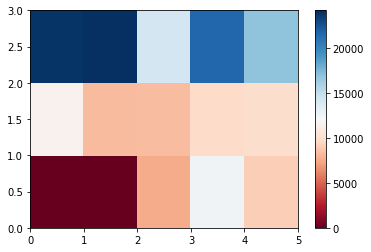

In [55]:
plt.pcolor(df_pivot, cmap="RdBu")
plt.colorbar()
plt.show

---
##**Análisis de Varianza (ANOVA)**

Asumiendo que se quiere analizar una variable categórica y ver la correlación entre las diferentes categorías.

ANOVA significa análisis de varianza. Puede ser utilizada para encontrar la correlación entre los diferentes frupos de una variables categórica.

De acuerdo al set de datos, podemos usar ANOVA para determinar si exista alguna diferencia en el precio promedio para las diferentes marcas de auto.

ANOVA regresados valores: F-test score y p-value.

F-test: Calcula la relación de varianza entre el promedio de los grupos sobre la variación entre cada uno de los grupos de muestra.

Pvalue: Grado de confianza.

In [56]:
from scipy import stats

In [60]:
df_anova=df[["make","price"]]
grouped_anova=df_anova.groupby(["make"])

In [61]:
#ANOVA entre Honda y Subaru
anova_results_l=stats.f_oneway(grouped_anova.get_group("honda")["price"],grouped_anova.get_group("subaru")["price"])
anova_results_l

F_onewayResult(statistic=0.19744030127462606, pvalue=0.6609478240622193)

In [62]:
#ANOVA entre Honda y Jaguar
anova_results_l=stats.f_oneway(grouped_anova.get_group("honda")["price"],grouped_anova.get_group("jaguar")["price"])
anova_results_l

F_onewayResult(statistic=400.925870564337, pvalue=1.0586193512077862e-11)

---
##**Correlación**

La correlación es una métrica estadística para medir las variables interdependientes.

**Correlación lineal positiva**

(0.0, 53397.199443168785)

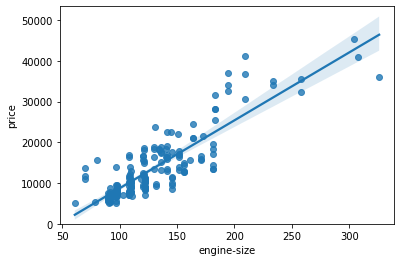

In [69]:
sns.regplot(x="engine-size", y="price", data=df)
plt.ylim(0,)

In [70]:
df[["engine-size", "price"]].corr()

,engine-size,price
engine-size,1.000000,0.872335
price,0.872335,1.000000


Podemos observar que existe una relación positiva lineal entre las dos variables.

**Correlación lineal negativa**

(0.0, 48160.196470521136)

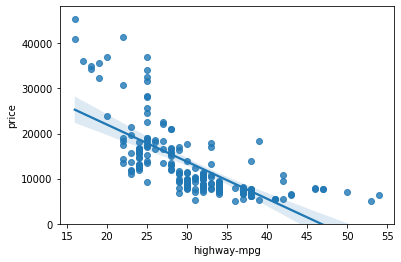

In [68]:
sns.regplot(x="highway-mpg", y="price", data=df)
plt.ylim(0,)

Se puede observar que cuando highway-mpg va hacia arriba, el valor del precio deciende. Esto quiere decir que las millas por galón son un buen predictor del precio.

---
##**Correlación - Estadística**

Se busca medir cuan fuerte es la correlación que existe entre dos variables.

**Correlación de Pearson**

Se obtienen dos valores:
* Coeficiente de correlación
* P-value

*Coeficiente de correlación*

* Cerca de +1: Gran relación positiva.
* Cerca de -1: Gran relación negativa.
* Cerca de 0: No hay relación.

*P-value*

* P-value < 0.001 = Fuerte certeza de resultado.
* P-value < 0.05 = Moderada certeza de resultado.
* P-value < 0.1 = Debil certeza de resultado.
* P-value > 0.1 = No existe certeza de resultado.

Se dice que hay una fuerte correlación cuando el coeficiente de correlación es cercano a 1 o -1 y el P-value es mejor que 0.001.

In [67]:
df.corr()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,horsepower,city-mpg,highway-mpg,price
symboling,1.000000,0.465190,-0.531954,-0.357612,-0.232919,-0.541038,-0.227691,-0.105790,-0.178515,0.071622,-0.035823,0.034606,-0.082391
normalized-losses,0.465190,1.000000,-0.056518,0.019209,0.084195,-0.370706,0.097785,0.110997,-0.114525,0.203434,-0.218749,-0.178221,0.133999
wheel-base,-0.531954,-0.056518,1.000000,0.874587,0.795144,0.589435,0.776386,0.569329,0.249786,0.352297,-0.470414,-0.544082,0.584642
length,-0.357612,0.019209,0.874587,1.000000,0.841118,0.491029,0.877728,0.683360,0.158414,0.555003,-0.670909,-0.704662,0.690628
width,-0.232919,0.084195,0.795144,0.841118,1.000000,0.279210,0.867032,0.735433,0.181129,0.642482,-0.642704,-0.677218,0.751265
height,-0.541038,-0.370706,0.589435,0.491029,0.279210,1.000000,0.295572,0.067149,0.261214,-0.110711,-0.048640,-0.107358,0.135486
curb-weight,-0.227691,0.097785,0.776386,0.877728,0.867032,0.295572,1.000000,0.850594,0.151362,0.751034,-0.757414,-0.797465,0.834415
engine-size,-0.105790,0.110997,0.569329,0.683360,0.735433,0.067149,0.850594,1.000000,0.028971,0.810773,-0.653658,-0.677470,0.872335
compression-ratio,-0.178515,-0.114525,0.249786,0.158414,0.181129,0.261214,0.151362,0.028971,1.000000,-0.205874,0.324701,0.265201,0.071107
horsepower,0.071622,0.203434,0.352297,0.555003,0.642482,-0.110711,0.751034,0.810773,-0.205874,1.000000,-0.803620,-0.770908,0.810533


---
##**Lab 3**

**Pregunta 1**

¿Cuál es el tipo de dato de la columna *peak-rpm*?

In [71]:
df['peak-rpm'].dtypes

dtype('O')

**Pregunta 2**

Encuentra la correlación entre las siguientes columnas: bore, stroke, compression-ratio y horse-power.

In [75]:
df[["bore","stroke","compression-ratio","horsepower"]].corr()

,compression-ratio,horsepower
compression-ratio,1.000000,-0.205874
horsepower,-0.205874,1.000000


**Pregunta 3 a)**

Encuentra la correlación entre stroke y price.

In [78]:
df["stroke"]=df["stroke"].astype(float)
df[["stroke","price"]].corr()

,stroke,price
stroke,1.00000,0.08231
price,0.08231,1.00000


**Pregunta 3 b)**

Verifica el resultado usando la función regplot().

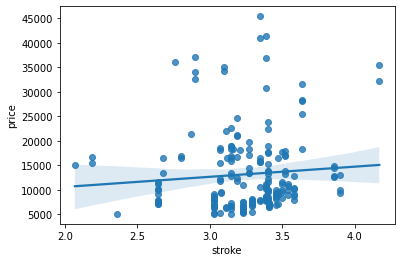

In [79]:
sns.regplot(x="stroke", y="price", data=df)

**Pregunta 4**

Usa la función groupby() para encontrar el promedio de precio de cada auto basado en su body-style.

In [80]:
df_gptest2 = df[['body-style','price']]
grouped_test_bodystyle = df_gptest2.groupby(['body-style'],as_index= False).mean()
grouped_test_bodystyle

,body-style,price
0,convertible,21890.500000
1,hardtop,22208.500000
2,hatchback,9957.441176
3,sedan,14459.755319
4,wagon,12371.960000


---
##**Graded Review Questions**

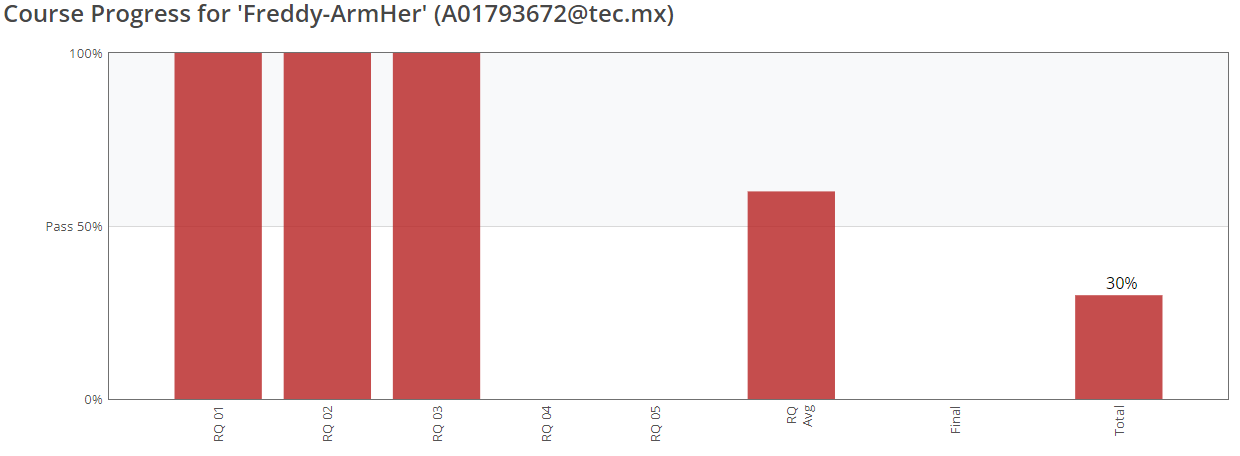